In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

from fully_connected_poisson import CompleteHomogeneousPoissonNetwork
from variational_bayes import VariationalBayes
from vem import ExponentialRW

In [2]:
num_nodes = 100; num_groups = 2; T_max = 10
lam_matrix = np.array([[2.0, 0.5],
                       [1.0, 5.0]])
# lam_matrix = np.array([[0.05, 2, 12],
#                        [0.01, 5, 10],
#                        [0.02, 3, 15]])

In [3]:
FCP = CompleteHomogeneousPoissonNetwork(num_nodes, num_groups, T_max,
                                        lam_matrix)
sampled_network, groups_in_regions = (
    FCP.sample_network(random_groups=False, change_point=True, num_cps=1,
                       group_assignment_type='alternate',
                       group_sizes=np.array([50,50]),
                       changing_nodes=np.array([5]))
)

change_node = FCP.changing_node; change_time = FCP.change_point_time

In [76]:
import pickle
with open('sampled_network.pkl', 'wb') as f:
    pickle.dump(sampled_network, f)
f.close()

In [33]:
result = {}

# Iterate over the first 50 keys
for key in list(sampled_network.keys())[:50]:
    # Extract the nested dictionary
    inner_dict = sampled_network[key]

    # Take only the first 50 items from the nested dictionary
    inner_dict_subset = {k: inner_dict[k] for k in list(inner_dict.keys())[:50]}

    # Store the result in the new dictionary
    result[key] = inner_dict_subset


In [18]:
int_length = 0.1
VB = VariationalBayes(sampled_network, num_nodes, num_groups, T_max, 
                      int_length, 
                      np.array([0.01] * num_groups ** 2).reshape((num_groups, num_groups)), 
                      np.array([0.01] * num_groups ** 2).reshape((num_groups,num_groups)),
                      np.array([1/2, 1/2 + 0.01] * int(num_groups / 2)),
                      simple=False)
VB.run_full_var_bayes(delta_z=1)

VB.tau_store[-1,:,:].mean(axis=0)

...Iteration: 1 of 99...
...Iteration: 2 of 99...


KeyboardInterrupt: 

In [ ]:
a = 

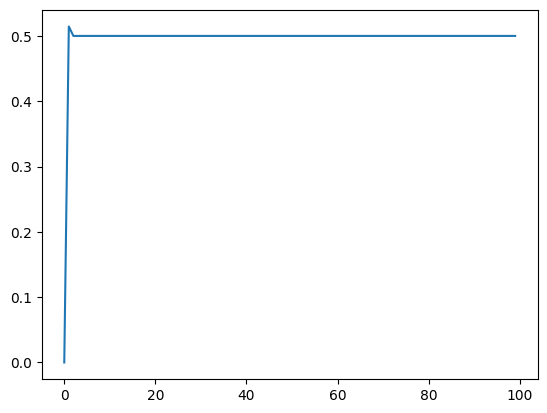

In [5]:
# print(change_time)
plt.plot(np.arange(0, T_max, int_length), np.mean(VB.tau_store[:,:,1], axis=1))
# plt.axvline(x=change_time, color='r', linestyle='--')

[85.05181333]


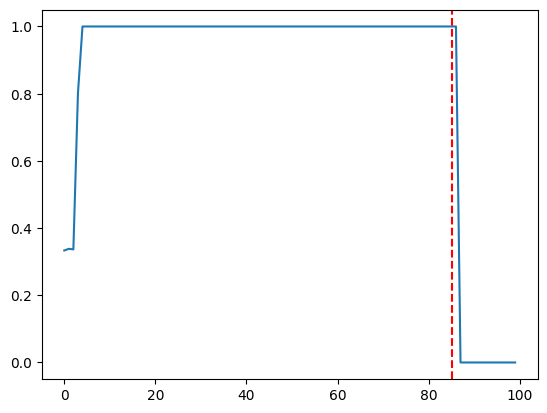

In [84]:
print(change_time)
plt.plot(np.arange(0, T_max, int_length), np.mean(VB.tau_store[:,change_node,1], axis=1))
plt.axvline(x=change_time, color='r', linestyle='--')

In [93]:
with np.printoptions(threshold=np.inf):
    print(VB.tau_store[-10,:,:].round(1))

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

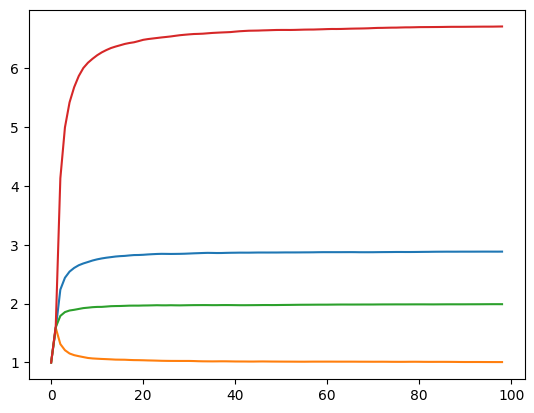

In [9]:
for j in range(2):
        plt.plot(np.arange(int(T_max/int_length) - 1),
                [VB.alpha_store[i,j,:] / VB.beta_store[i,j,:] for i in np.arange(int(T_max/int_length) - 1)])

In [105]:
VB.alpha / VB.beta

array([[4.90213320e+00, 1.00615478e+01, 8.22164472e-03],
       [3.00001262e+00, 1.43869812e+01, 1.87601895e-02],
       [1.96874875e+00, 1.20486037e+01, 4.53212078e-02]])

In [56]:
with open('test_read.txt', 'r') as file:

    lines = file.readlines()

    data = lines[1].split()